In [1]:
cd 13510

In [2]:
punlearn dmstat
dmstat img.fits"[sky=circle(4024,4232,100)]" cen+ clip+

abell1775_broad_thresh.img.fill_IMAGE(x, y)
    min:	0 	      @:	( 4024 4132 )
    max:	7 	      @:	( 4039 4207 )
cntrd[log] :	( 100.19597819 92.563962736 )
cntrd[phys]:	( 4023.1959782 4223.5639627 )
sigma_cntrd:	( 81.505644473 76.61361709 )
   good:	31417 
   null:	8984 


In [3]:
# ds9 img.fits -region command "physical;circle  4023.1959782 4223.5639627 10"

In [4]:
punlearn hexgrid
plist hexgrid
/bin/rm -rf hexgrid
mkdir hexgrid


Parameters for /home/kjg/cxcds_param4/hexgrid.par

        infile =                  Input image
       outfile =                  Output hexagon grid image
       sidelen = 10               Side length of hexagons
       (binimg = )                Output image file
         (xref = 0)               X coordinate of reference point (image coordinates)
         (yref = 0)               Y coordinate of reference point (image coordinates)
      (verbose = 0)               Tool chatter level
      (clobber = no)              Remove outfile if it already exists?
         (mode = ql)              



In [5]:
time hexgrid img.fits \
  outfile=hexgrid/hex25.map \
  binimg=hexgrid/hex25.img \
  sidelen=25 \
  xref=100 yref=93 clob+


real	0m3.436s
user	0m2.917s
sys	0m0.480s


In [6]:
dmimggrad hexgrid/hex25.map hexgrid/hex25.grad sobel mag clob+

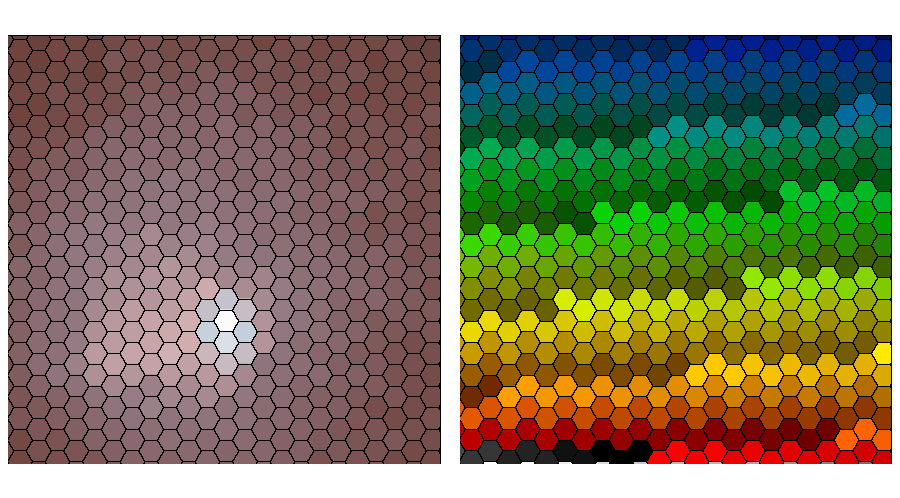

In [7]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  hexgrid/hex25.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask hexgrid/hex25.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  hexgrid/hex25.map -scale linear \
  -region delete all \
  -mask color black -mask hexgrid/hex25.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png hexgrid/hex25.abin.png -quit

display < hexgrid/hex25.abin.png